<a href="https://colab.research.google.com/github/Jeremy-22/Tarea-6/blob/main/CapyFu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Layer
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np
import math

In [56]:
class MMH(Sequential):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    self.loss_tracker = keras.metrics.Mean(name = 'loss')

  @property
  def metrics(self):
    return [self.loss_tracker]

  def train_step(self, data):
    batch_size = tf.shape(data)[0]
    x = tf.random.uniform((batch_size, 1), minval = -1, maxval = 1)
    f = tf.math.cos(2*x)

    with tf.GradientTape() as tape:
      y_pred = self(x, training = True)
      loss = tf.math.reduce_mean(tf.math.square(y_pred-f))
    grads = tape.gradient(loss, self.trainable_weights)
    self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
    self.loss_tracker.update_state(loss)

    return{"loss": loss_tracker.result()}

## capa

In [57]:
class PolynomialLayer(tf.keras.layers.Layer):
    def __init__(self, num_outputs=3):
        super(PolynomialLayer, self).__init__()
        self.num_outputs = num_outputs

        self.freq = tf.range(0, self.num_outputs + 1)

        self.kernel = self.add_weight("kernel",
                                      shape=[self.num_outputs + 1])

    def call(self, inputs):

        x = tf.convert_to_tensor(inputs)

        if (inputs.shape == ()):
            inputs=(inputs,)

        elif (len(inputs.shape)==1):

            inputs=tf.expand_dims(inputs, axis=1)
        batch = tf.shape(inputs)[0]

        modes = self.kernel[0] + self.kernel[1]*x + self.kernel[2]*x**2 + self.kernel[3]*x**3
        return tf.expand_dims(modes, axis=1)

In [79]:
model = MMH()
model.add(PolynomialLayer())
model.build(input_shape=(1,))
model.add(Dense(20, activation = 'tanh'))
model.add(Dense(50, activation = 'tanh'))
model.add(Dense(100, activation = 'tanh'))
model.add(Dense(10, activation = 'tanh'))
model.summary()

Model: "mmh_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 polynomial_layer_21 (Polyn  (1, 1)                    4         
 omialLayer)                                                     
                                                                 
 dense_26 (Dense)            (1, 20)                   40        
                                                                 
 dense_27 (Dense)            (1, 50)                   1050      
                                                                 
 dense_28 (Dense)            (1, 100)                  5100      
                                                                 
 dense_29 (Dense)            (1, 10)                   1010      
                                                                 
Total params: 7204 (28.14 KB)
Trainable params: 7204 (28.14 KB)
Non-trainable params: 0 (0.00 Byte)
__________________________

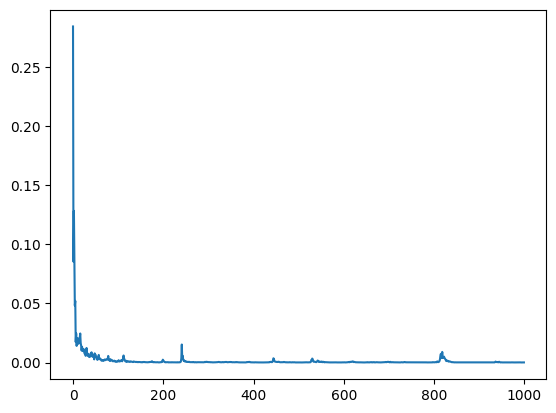

In [80]:
model.compile(optimizer=Adam(learning_rate=0.01), metrics=['loss'])
x=tf.linspace(-1, 1, 100)
history = model.fit(x, epochs=1000, verbose=0)
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 3ms/step


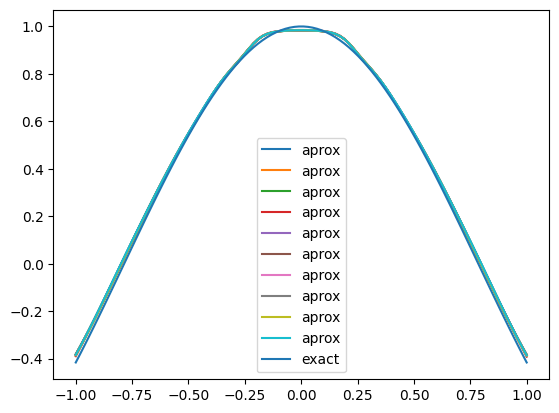

In [81]:
a=model.predict(x)
plt.plot(x, a, label="aprox")
plt.plot(x, tf.math.cos(2*x), label="exact")
plt.legend()
plt.show()